<div style="background-color:#aaf1aa; padding: 15px; border-radius: 5px; border-left: 6px solid #3498db; font-family: Arial, sans-serif; color: #333333;">


# 📝 **US Accidents Predictive Modeling and Analysis Using Machine Learning**

*Developed by:* **Ali Masaoodi**

*Role:* AI Engineer, and Researcher.

---

</div>


<div style="padding: 25px; border-radius: 5px; border-left: 6px solid #3498db; font-family: Arial, sans-serif;">

### The "U.S. Accidents from 2016 to 2020" dataset contains detailed records of **2.5 million accidents** across the United States, with a total data size of **1.33 GB**. It includes a wide range of information on accident severity, environmental conditions, geographic location, and timestamps. 

### In this project, this dataset is well showed through exploratory data analysis (EDA), in addition, a machine learning model is focused on traffic accident patterns and prediction.
</div>

<div style="background-color:#aaf1aa; padding: 15px; border-radius: 5px; border-left: 6px solid #3498db; font-family: Arial, sans-serif; color: #333333;">

# **Import All Necessary Libraries**
</div>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings

<div style="background-color:#aaf1aa; padding: 15px; border-radius: 5px; border-left: 6px solid #3498db; font-family: Arial, sans-serif; color: #333333;">

# **Load Dataset**
</div>


In [2]:
# Load Dataset
df = pd.read_csv('./US_Accidents_June20.csv')

# Display the first few rows of the dataset
print(df.head(1))

    ID    Source    TMC  Severity           Start_Time             End_Time  \
0  A-1  MapQuest  201.0         3  2016-02-08 05:46:00  2016-02-08 11:00:00   

   Start_Lat  Start_Lng  End_Lat  End_Lng  ...  Roundabout Station   Stop  \
0  39.865147 -84.058723      NaN      NaN  ...       False   False  False   

  Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset Civil_Twilight  \
0           False          False        False          Night          Night   

  Nautical_Twilight Astronomical_Twilight  
0             Night                 Night  

[1 rows x 49 columns]


In [3]:
# Summary statistics
print(df.describe())

                TMC      Severity     Start_Lat     Start_Lng       End_Lat  \
count  2.478818e+06  3.513617e+06  3.513617e+06  3.513617e+06  1.034799e+06   
mean   2.080226e+02  2.339929e+00  3.654195e+01 -9.579151e+01  3.755758e+01   
std    2.076627e+01  5.521935e-01  4.883520e+00  1.736877e+01  4.861215e+00   
min    2.000000e+02  1.000000e+00  2.455527e+01 -1.246238e+02  2.457011e+01   
25%    2.010000e+02  2.000000e+00  3.363784e+01 -1.174418e+02  3.399477e+01   
50%    2.010000e+02  2.000000e+00  3.591687e+01 -9.102601e+01  3.779736e+01   
75%    2.010000e+02  3.000000e+00  4.032217e+01 -8.093299e+01  4.105139e+01   
max    4.060000e+02  4.000000e+00  4.900220e+01 -6.711317e+01  4.907500e+01   

            End_Lng  Distance(mi)        Number  Temperature(F)  \
count  1.034799e+06  3.513617e+06  1.250753e+06    3.447885e+06   
mean  -1.004560e+02  2.816167e-01  5.975383e+03    6.193512e+01   
std    1.852879e+01  1.550134e+00  1.496624e+04    1.862106e+01   
min   -1.244978e+02 

<div style="background-color:#aaf1aa; padding: 15px; border-radius: 5px; border-left: 6px solid #3498db; font-family: Arial, sans-serif; color: #333333;">

# **Feature Engineering**
</div>


In [ ]:
# Ensure Start_Time is in datetime format
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract hour from Start_Time
df['Hour'] = df['Start_Time'].dt.hour

# Extract date from Start_Time
df['Date'] = df['Start_Time'].dt.date

# Extract DayOfWeek from Start_Time
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek

In [5]:
# Prepare features and target variable for prediction
features = df[['Hour', 'DayOfWeek', 'Temperature(F)', 'Visibility(mi)', 'Weather_Condition']]
target = df['Severity']

# Encode categorical features like Weather_Condition
features = pd.get_dummies(features, columns=['Weather_Condition'], drop_first=True)

<div style="background-color:#aaf1aa; padding: 15px; border-radius: 5px; border-left: 6px solid #3498db; font-family: Arial, sans-serif; color: #333333;">

# **Data Preprocessing**
</div>


In [6]:
# Check for missing values
print(df.isnull().sum())

ID                             0
Source                         0
TMC                      1034799
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2478818
End_Lng                  2478818
Distance(mi)                   0
Description                    1
Number                   2262864
Street                         0
Side                           0
City                         112
County                         0
State                          0
Zipcode                     1069
Country                        0
Timezone                    3880
Airport_Code                6758
Weather_Timestamp          43323
Temperature(F)             65732
Wind_Chill(F)            1868249
Humidity(%)                69687
Pressure(in)               55882
Visibility(mi)             75856
Wind_Direction             58874
Wind_Speed(mph)           454609
Precipitat

In [ ]:
# Drop rows with NaN values in features and target
features.dropna(inplace=True)

# Align target with features after dropping
target = target[features.index]

In [8]:
# Drop or fill missing values
df.dropna(subset=['Severity', 'Start_Time', 'State', 'Weather_Condition'], inplace=True)

In [ ]:
# Check for missing values in features and target
print(features.isnull().sum())
print(target.isnull().sum())

Hour                                         0
DayOfWeek                                    0
Temperature(F)                               0
Visibility(mi)                               0
Weather_Condition_Blowing Dust / Windy       0
                                            ..
Weather_Condition_Volcanic Ash               0
Weather_Condition_Widespread Dust            0
Weather_Condition_Widespread Dust / Windy    0
Weather_Condition_Wintry Mix                 0
Weather_Condition_Wintry Mix / Windy         0
Length: 130, dtype: int64
0


In [10]:
# impute missing values using mean strategy 

from sklearn.impute import SimpleImputer

# Create an imputer for the features
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or other strategies

# Fit and transform the features
features_imputed = imputer.fit_transform(features)

<div style="background-color:#aaf1aa; padding: 15px; border-radius: 5px; border-left: 6px solid #3498db; font-family: Arial, sans-serif; color: #333333;">

# **Exploratory Data Analysis (EDA)**
</div>


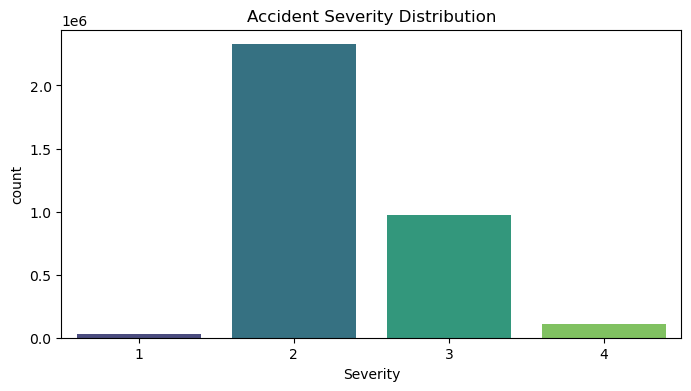

In [11]:
# Visualize accident severity distribution
plt.figure(figsize=(8, 4))
sns.countplot(x='Severity', data=df, palette='viridis')
plt.title('Accident Severity Distribution')
plt.show()

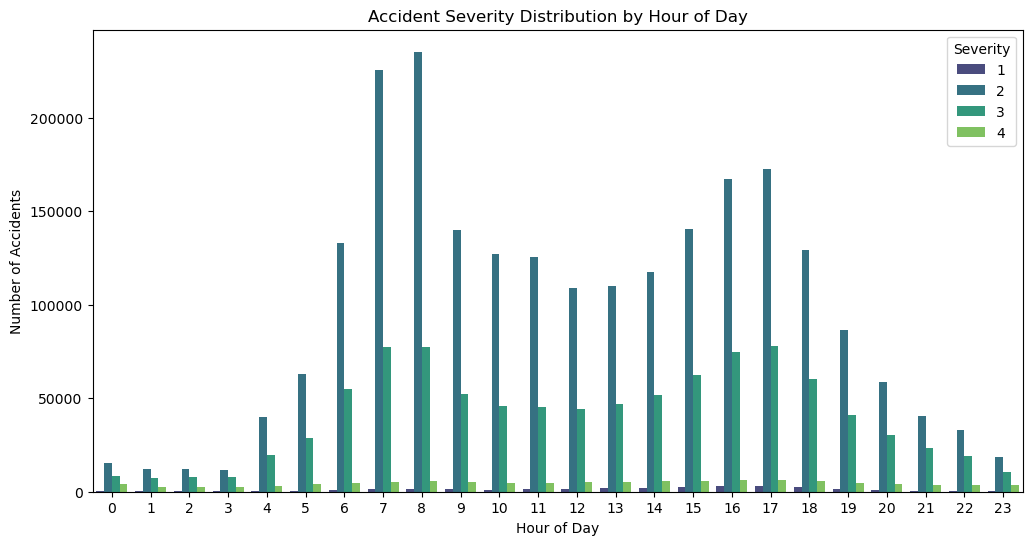

In [ ]:
# Accident Severity Distribution by Hour of Day

plt.figure(figsize=(12, 6))

# Create the plot using seaborn
sns.countplot(data=df, x='Hour', hue='Severity', palette='viridis')

# Enhance plot with titles and labels
plt.title('Accident Severity Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.legend(title='Severity')

# Show the plot
plt.show()

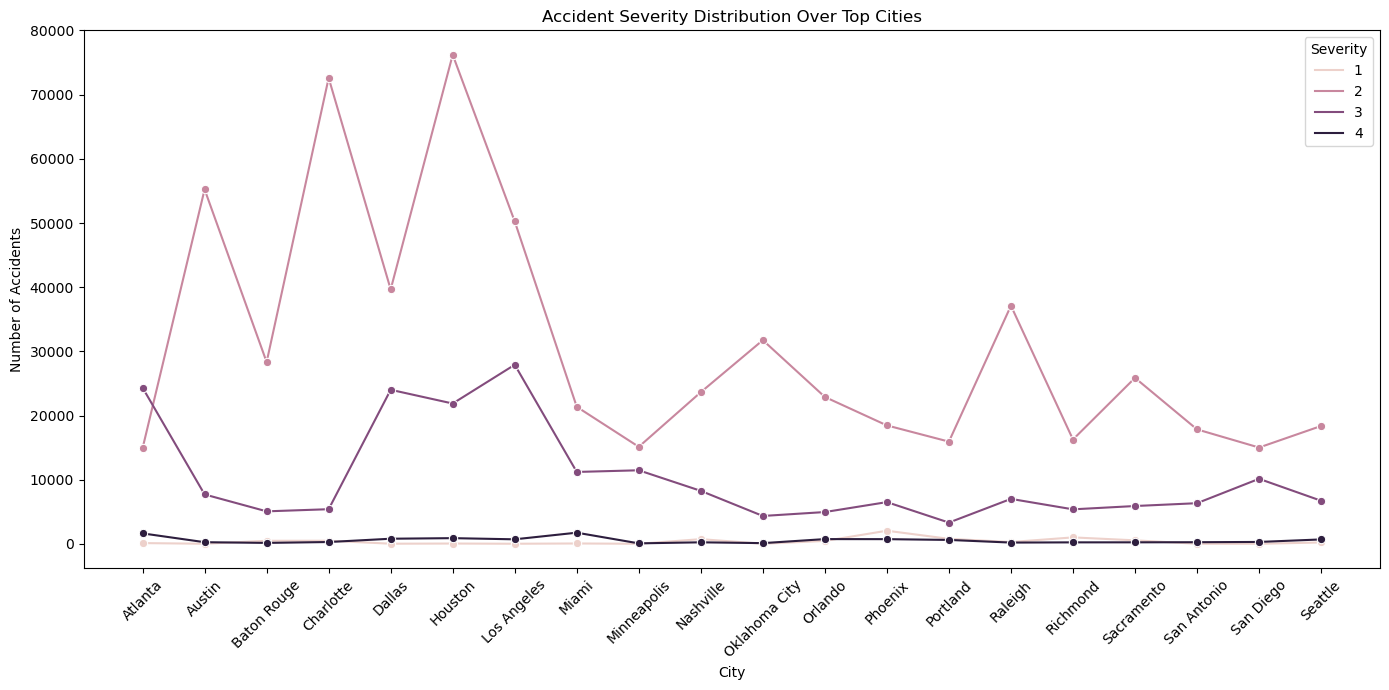

In [ ]:
# Accident Severity Distribution Over Top Cities

# Group by City and Severity, counting occurrences
severity_count = df.groupby(['City', 'Severity']).size().reset_index(name='Count')

# Get top 20 cities by accident count
top_cities = severity_count.groupby('City')['Count'].sum().nlargest(20).index
top_severity_count = severity_count[severity_count['City'].isin(top_cities)]

# Set up the plot
plt.figure(figsize=(14, 7))
sns.lineplot(data=top_severity_count, x='City', y='Count', hue='Severity', marker='o')
plt.title('Accident Severity Distribution Over Top Cities')
plt.xlabel('City')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity')
plt.tight_layout() 
plt.show()

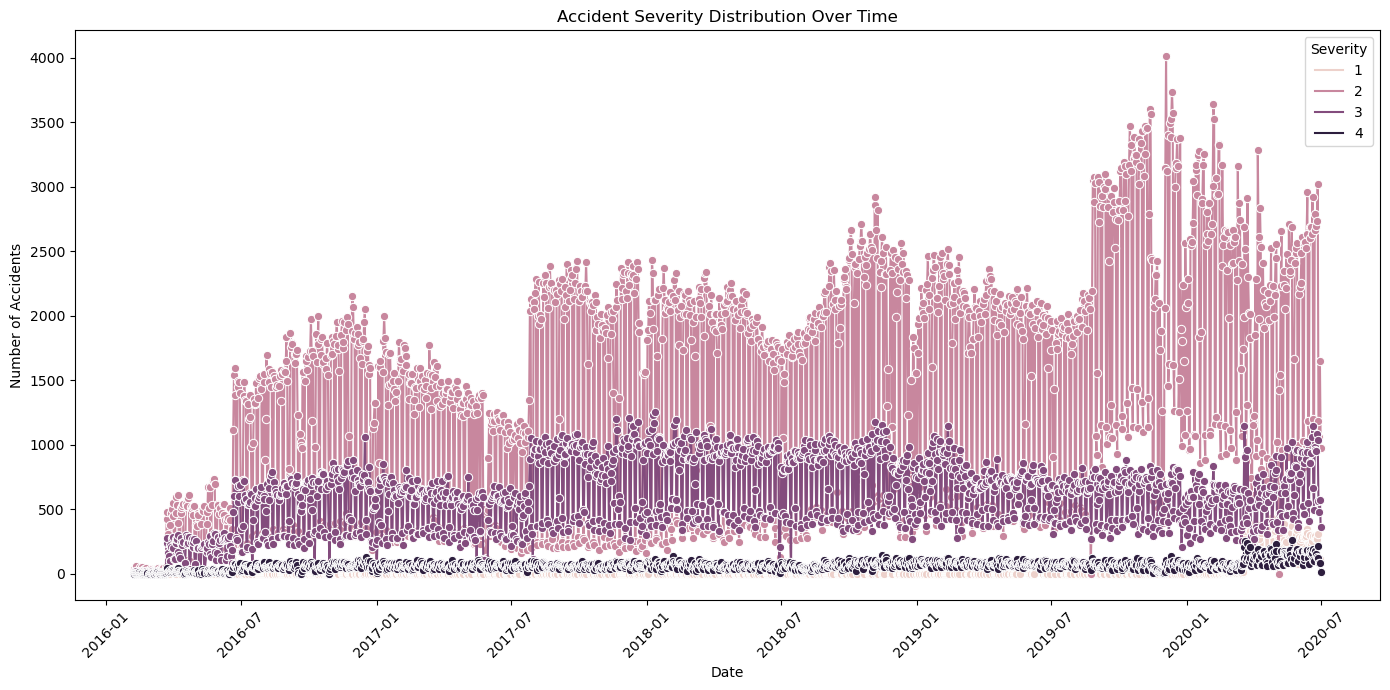

In [ ]:
# Accident Severity Distribution Over Time

# Group by Date and Severity, counting occurrences
severity_count = df.groupby(['Date', 'Severity']).size().reset_index(name='Count')

# Set up the plot
plt.figure(figsize=(14, 7))

# Create a line plot using seaborn
sns.lineplot(data=severity_count, x='Date', y='Count', hue='Severity', marker='o')
plt.title('Accident Severity Distribution Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Severity')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


<div style="background-color:#aaf1aa; padding: 15px; border-radius: 5px; border-left: 6px solid #3498db; font-family: Arial, sans-serif; color: #333333;">

# **Predictive Modeling**
</div>


In [15]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Accuracy: 0.6649523053392333
              precision    recall  f1-score   support

           1       0.31      0.04      0.07      8657
           2       0.70      0.90      0.79    695514
           3       0.43      0.18      0.25    290907
           4       0.37      0.11      0.17     32710

    accuracy                           0.66   1027788
   macro avg       0.45      0.31      0.32   1027788
weighted avg       0.61      0.66      0.61   1027788



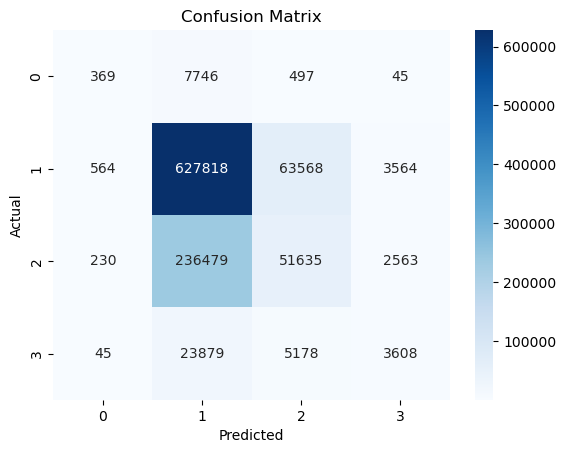

In [16]:
# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


<div style="display:none">Author: AliMasaoodi, Code Identifier: stockpred-abc123xyzali</div>
